In [2]:
#imports
import csv 
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
#converting log file to csv file

data_folder = Path.cwd()/ "data"
data_folder.mkdir(exist_ok=True)

log_file = data_folder/"log.txt"
csv_file = data_folder/"rawlog.csv"


with open(log_file, 'r') as file:
    lines = file.readlines()

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)

    # Write the header row (variable names)
    header = ['second', 'distance', 'motion', 'lightIntensity', 'occupied']
    csv_writer.writerow(header)

    # Process each line in the log file
    for line in lines:
        # Remove extra spaces and newline characters
        line = line.strip()

        # Split the line to extract the id and variables
        id_part, data_part = line.split(' -> ')
        second = id_part.strip()  # Renamed from 'id' to 'second'

        # Further split the data part to extract individual variable values
        data_items = data_part.split(', ')
        values = [second]  # Start with second

        # Extract the values from each variable
        data_dict = {item.split(': ')[0]: item.split(': ')[1].strip() for item in data_items}

        # Ensure all variables are in the correct order and connected_devices is handled properly
        values.extend([
            data_dict.get('distance', '0.00'),
            data_dict.get('motion', '0'),
            data_dict.get('lightIntensity', '0.00'),
            data_dict.get('occupied', '0')
        ])

        csv_writer.writerow(values)

print(f'Conversion complete. Data saved to {csv_file}.')

Conversion complete. Data saved to c:\Users\kentv\OneDrive\Desktop\Smart Alert\Smart-Alert-Lab-ML\data\rawlog.csv.


In [5]:
#cleaning the data

data_folder = Path.cwd()/ "data"
data_folder.mkdir(exist_ok=True)

csv_file = data_folder/"rawlog.csv"
modified_csv_file = data_folder/"modified_log.csv"

df = pd.read_csv(csv_file)

# Filter out rows where distance is not greater than 0
df = df[df["distance"] > 0].copy()

# Reset the 'seconds' column to increment sequentially from 1 to the length of the DataFrame
df["second"] = range(1, len(df) + 1)

df.to_csv(modified_csv_file, index=False)

In [3]:
#importing the cleaned data for analysis
#note this is not modified_log.csv but logwNotes.csv as I have manually added occupied_notes
data_folder = Path.cwd()/ "data"
data_folder.mkdir(exist_ok=True)

csv_analysis = data_folder/"logwNotes.csv"
df = pd.read_csv(csv_analysis)

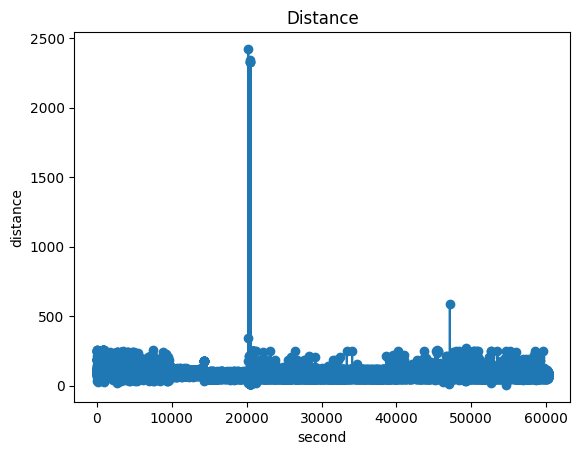

In [7]:
#plotting Distance 
plt.plot(df['second'], df['distance'], marker='o')
plt.title('Distance')
plt.xlabel('second')
plt.ylabel('distance')
plt.show()

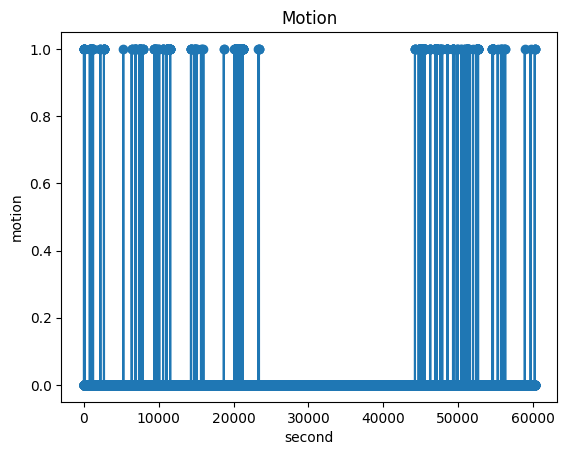

In [8]:
#plotting Motion

plt.plot(df['second'], df['motion'], marker='o')
plt.title('Motion')
plt.xlabel('second')
plt.ylabel('motion')
plt.show()

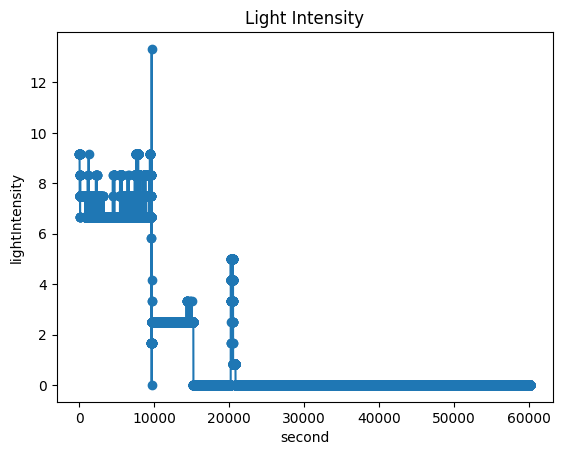

In [9]:
#plotting lightIntensity

plt.plot(df['second'], df['lightIntensity'], marker='o')
plt.title('Light Intensity')
plt.xlabel('second')
plt.ylabel('lightIntensity')
plt.show()

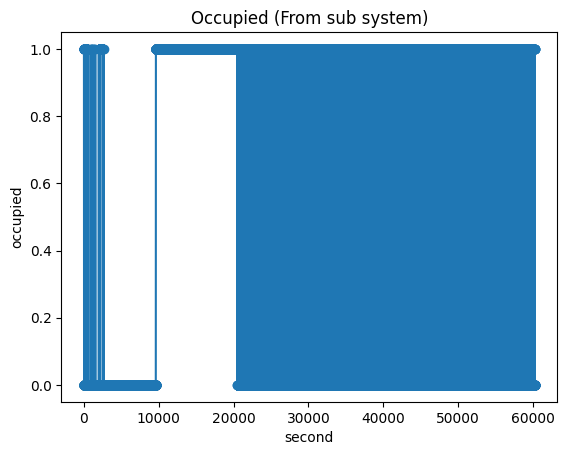

In [10]:
#plotting occupied

plt.plot(df['second'], df['occupied'], marker='o')
plt.title('Occupied (From sub system)')
plt.xlabel('second')
plt.ylabel('occupied')
plt.show() 

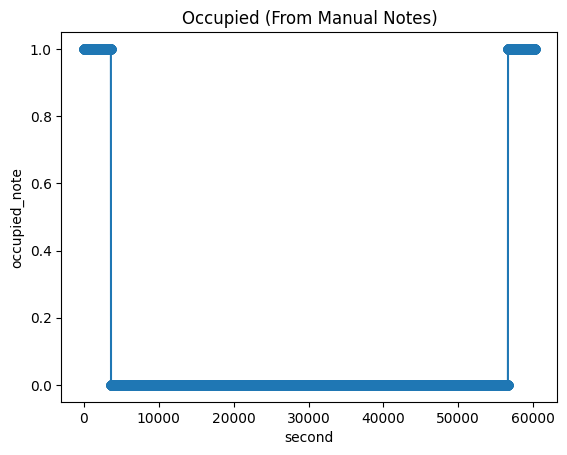

In [4]:
#plotting occupied_note

plt.plot(df['second'], df['occupied_note'], marker='o')
plt.title('Occupied (From Manual Notes)')
plt.xlabel('second')
plt.ylabel('occupied_note')
plt.show() 